In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
from scipy.special import inv_boxcox

In [2]:
df = pd.read_csv("../data/processed/bank-dataset-additional-processed-skewness.csv",index_col=0)

In [3]:
df.head()

,default,housing,loan,y,duration_boxcox,campaign_cbrt,pdays_special,pdays_transformed,had_previous,age_scaled,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_telephone,poutcome_nonexistent,poutcome_success,month_num,month_sin,month_cos
0,False,False,False,False,8.480303,1.0,0,6.907755,0,1.642253,...,False,False,False,False,True,True,False,5,0.5,-0.866025
2,False,True,False,False,8.166177,1.0,0,6.907755,0,-0.196452,...,True,False,False,False,True,True,False,5,0.5,-0.866025
3,False,False,False,False,7.319957,1.0,0,6.907755,0,0.093870,...,False,False,False,False,True,True,False,5,0.5,-0.866025
4,False,False,True,False,8.842255,1.0,0,6.907755,0,1.642253,...,True,False,False,False,True,True,False,5,0.5,-0.866025
6,False,False,False,False,7.152132,1.0,0,6.907755,0,1.932575,...,False,False,True,False,True,True,False,5,0.5,-0.866025


In [4]:
df.columns

Index(['default', 'housing', 'loan', 'y', 'duration_boxcox', 'campaign_cbrt',
       'pdays_special', 'pdays_transformed', 'had_previous', 'age_scaled',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_telephone', 'poutcome_nonexistent', 'poutcome_success',
       'month_num', 'month_sin', 'month_cos'],
      dtype='object')

In [5]:
# Features and target
X = df.drop('y', axis=1)
y = df['y']

In [6]:
# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# testing with logistic regression model

In [7]:
# Load the model back
with open('models/logistic_regression_model-skewness.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can predict
y_pred = loaded_model.predict(X)

In [8]:
# Evaluation
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Accuracy: 0.7603975334557859
Confusion Matrix:
 [[20940  5689]
 [ 1616  2243]]
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.79      0.85     26629
        True       0.28      0.58      0.38      3859

    accuracy                           0.76     30488
   macro avg       0.61      0.68      0.62     30488
weighted avg       0.85      0.76      0.79     30488



# testing with random forest model

In [9]:
# Load the model back
with open('models/random_forest_model-skewness.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can predict
y_pred = loaded_model.predict(X)

In [10]:
# Evaluation
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Accuracy: 0.8692600367357649
Confusion Matrix:
 [[25944   685]
 [ 3301   558]]
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.97      0.93     26629
        True       0.45      0.14      0.22      3859

    accuracy                           0.87     30488
   macro avg       0.67      0.56      0.57     30488
weighted avg       0.83      0.87      0.84     30488



In [11]:
# Reverse transform duration for X-axis labeling
def inverse_boxcox(boxcox_value, lambda_val):
    if lambda_val == 0:
        return np.exp(boxcox_value) - 0.1
    else:
        return np.power(boxcox_value * lambda_val + 1, 1 / lambda_val) - 0.1
lambda_val = np.float64(0.14208711538356447)

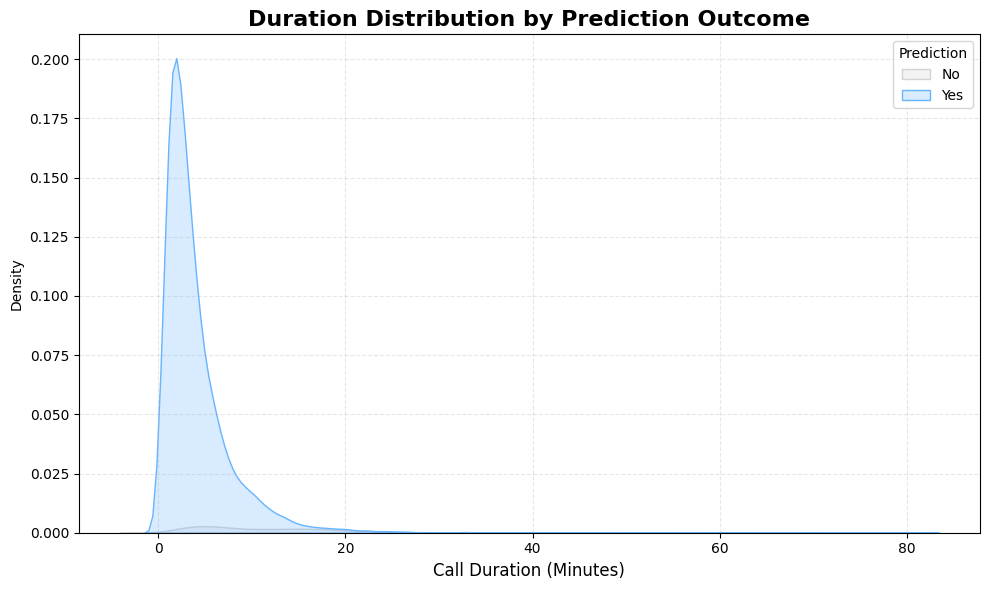

In [12]:
unseen_df = df.copy()

# Now you can safely add predictions
unseen_df['prediction'] = y_pred

# Make a copy and add a new column
#unseen_df['duration_seconds'] = inverse_boxcox(unseen_df['duration_boxcox'], lambda_val)

# Reverse Box-Cox transformation to get back the original durations
unseen_df['duration_original'] = inv_boxcox(unseen_df['duration_boxcox'], lambda_val)

# Now convert duration from seconds to minutes
unseen_df['duration_minutes'] = unseen_df['duration_original'] / 60

# Custom color palette for Statista/Pew/Nielsen style
colors = ['#66b3ff', '#d3d3d3']  # Light blue for 'Yes', light gray for 'No'

# Plot Duration vs Prediction
plt.figure(figsize=(10, 6))
sns.kdeplot(data=unseen_df, x='duration_minutes', hue='prediction', fill=True, palette=colors)

plt.title('Duration Distribution by Prediction Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Call Duration (Minutes)', fontsize=12)
plt.ylabel('Density')
plt.legend(title='Prediction', labels=['No', 'Yes'])
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("plots/effect-of-duration-reversed.png")
plt.show()

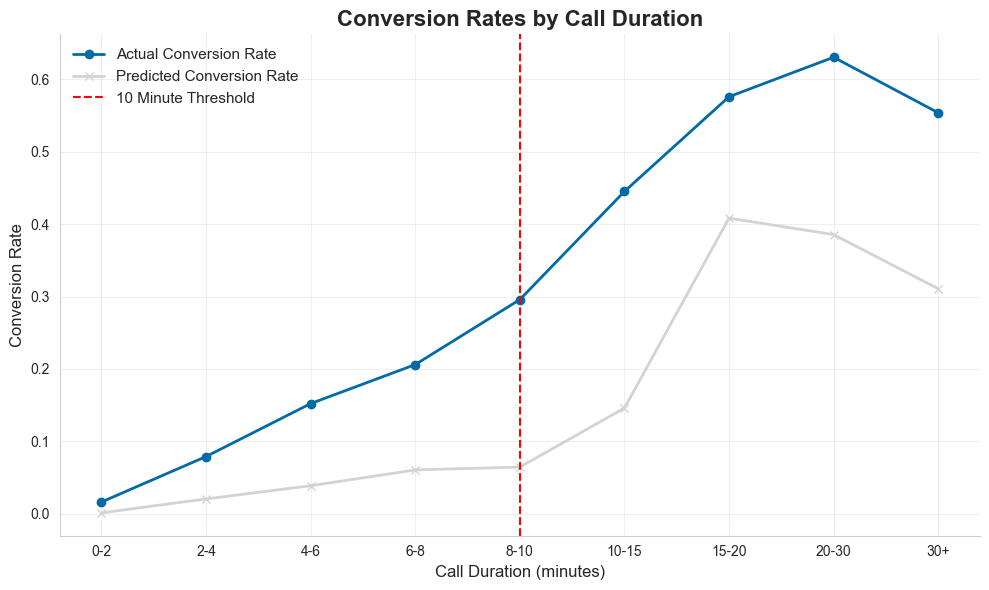

In [25]:

# Apply seaborn's whitegrid style - a common base for professional visualizations
sns.set_style('whitegrid')

# Professional color scheme - Pew Research blue and complementary color
colors = ['#006BA6', '#D3D3D3']  # Pew Research blue and light gray

# Create the plot with enhanced styling
plt.figure(figsize=(10, 6))

# Plot actual conversion rate with professional styling
plt.plot(conversion_stats['duration_bin'], conversion_stats['actual_conversion_rate'], 
         marker='o', color=colors[0], label='Actual Conversion Rate', linewidth=2)

# Plot predicted conversion rate
plt.plot(conversion_stats['duration_bin'], conversion_stats['predicted_conversion_rate'], 
         marker='x', color=colors[1], label='Predicted Conversion Rate', linewidth=2)

# Add vertical line for 10 minute threshold
plt.axvline(x='8-10', color='red', linestyle='--', label='10 Minute Threshold')

# Professional titles and labels with proper sizing
plt.title('Conversion Rates by Call Duration', fontsize=16, fontweight='bold')
plt.xlabel('Call Duration (minutes)', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)

# Clean legend without border
plt.legend(frameon=False, fontsize=11)

# Subtle grid lines and clean borders
plt.grid(True, alpha=0.3)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')

# Professional font sizing for axis labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('plots/conversion_rates_call_duration_statista_style.png', dpi=300)
plt.show()

In [14]:
# Given lambda value
lambda_val = np.float64(0.14208711538356447)

# Duration value from Box-Cox transformed data
duration_boxcox_value = 0.200

# Inverse Box-Cox transformation to get the original duration value
original_duration = (duration_boxcox_value * lambda_val + 1) ** (1 / lambda_val) - 0.1

# Convert the original duration to minutes (assuming the original value was in seconds)
duration_in_minutes = original_duration / 60

Percentage of 'Yes' predictions that are for calls under 10 minutes: 50.52%


/var/folders/wv/_1967qc55074zj0wy7nnjv0w0000gn/T/ipykernel_55971/1736389108.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_predictions['duration_bin'] = pd.cut(yes_predictions['duration_minutes'],


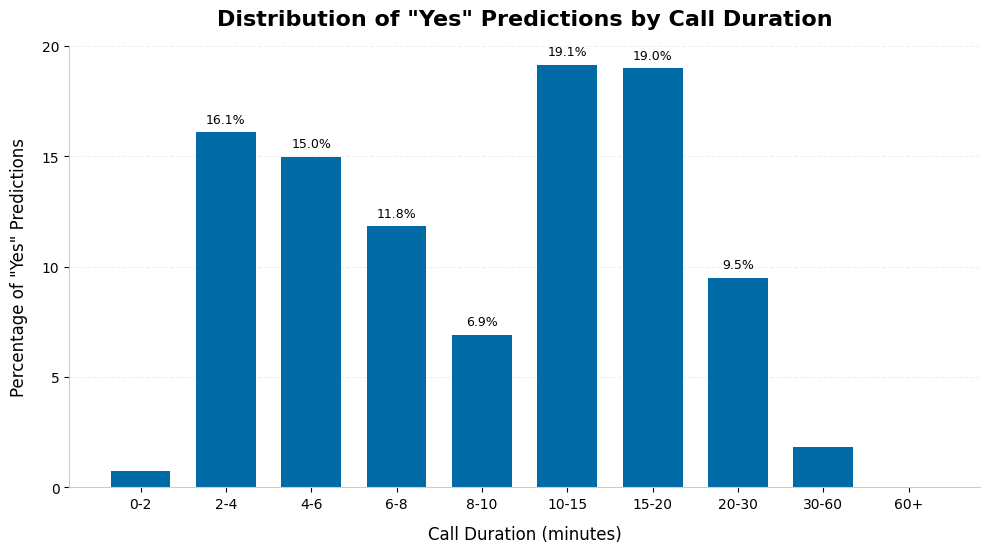

In [21]:
# Calculate what percentage of "Yes" predictions are for calls under 10 minutes
unseen_df['prediction'] = y_pred
yes_predictions = unseen_df[unseen_df['prediction'] == 1]
yes_under_10 = yes_predictions[yes_predictions['duration_minutes'] < 10]

# Calculate the percentage
percentage_yes_under_10 = (len(yes_under_10) / len(yes_predictions)) * 100
print(f"Percentage of 'Yes' predictions that are for calls under 10 minutes: {percentage_yes_under_10:.2f}%")

# Create a more detailed breakdown by duration ranges
duration_bins = [0, 2, 4, 6, 8, 10, 15, 20, 30, 60, float('inf')]
bin_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-15', '15-20', '20-30', '30-60', '60+']

yes_predictions['duration_bin'] = pd.cut(yes_predictions['duration_minutes'], 
                                         bins=duration_bins, labels=bin_labels)
duration_distribution = yes_predictions['duration_bin'].value_counts().sort_index()

# Plot the distribution - Pew Research/Statista style
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

# Set professional Pew Research style colors - using muted blue
pew_blue = '#006BA6'  # Pew Research blue shade
duration_distribution_percent = (duration_distribution / len(yes_predictions)) * 100

# Create the bar chart with proper spacing
bars = ax.bar(range(len(duration_distribution_percent)), 
       duration_distribution_percent, 
       color=pew_blue,
       width=0.7)  # Width adjusted for proper spacing

# Add data labels on top of bars for key values
for i, bar in enumerate(bars):
    if duration_distribution_percent.iloc[i] > 5:  # Only label bars with significant values
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{duration_distribution_percent.iloc[i]:.1f}%',
                ha='center', va='bottom', fontsize=9)

# Customize the appearance
ax.set_xticks(range(len(duration_distribution_percent)))
ax.set_xticklabels(duration_distribution_percent.index, fontsize=10)
ax.set_yticks(range(0, 21, 5))  # Y-axis ticks every 5%
ax.set_ylim(0, 20)  # Set y limit to give space for labels

# Add subtle grid lines only on y-axis
ax.yaxis.grid(True, linestyle='--', alpha=0.3, color='#cccccc')
ax.set_axisbelow(True)  # Place gridlines behind bars

# Remove top and right spines for clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')

# Add titles and labels in Pew style
plt.title('Distribution of "Yes" Predictions by Call Duration', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Call Duration (minutes)', fontsize=12, labelpad=10)
plt.ylabel('Percentage of "Yes" Predictions', fontsize=12, labelpad=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to make room for source note
plt.savefig('plots/call-predictions-yes-pew-style.png', dpi=300)
plt.show()

# testing with xgboost model

In [22]:
# Load the model back
with open('models/xgboost_model_skewness.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can predict
y_pred = loaded_model.predict(X)

In [23]:
# Evaluation
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Accuracy: 0.762791918131724
Confusion Matrix:
 [[20472  6157]
 [ 1075  2784]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.77      0.85     26629
        True       0.31      0.72      0.43      3859

    accuracy                           0.76     30488
   macro avg       0.63      0.75      0.64     30488
weighted avg       0.87      0.76      0.80     30488



## Model Performance Summary

| Model               | Accuracy | Precision (True) | Recall (True) | F1 (True) | Notes                                              |
|---------------------|:--------:|:----------------:|:-------------:|:---------:|----------------------------------------------------|
| Logistic Regression | 76.04%   | 0.28              | 0.58          | 0.38      | Decent recall boost, precision still low           |
| Random Forest       | 86.93%   | 0.45              | 0.14          | 0.22      | Great accuracy for "no" class, struggles on "yes"  |
| XGBoost             | 76.28%   | 0.31              | 0.72          | 0.43      | Recall king, decent F1, similar accuracy to LogReg |
